In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

In [9]:
def plt_hist(plt_data, keys=['IN', 'TP', 'FN']):
    plt.figure(figsize=(150, 25))
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[0]]['len_trace'], color='red')
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[1]]['len_trace'], color='green')
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[2]]['len_trace'], color='blue')
    plt.show()

In [10]:
def plt_pie(plt_data):
    freq = plt_data['kind'].value_counts()
    plt.pie(freq, labels=freq.index, explode=(0.05, 0, 0), autopct='%.1f%%',
            colors=['#81ecec','#ff7675','#6c5ce7'], startangle=90, counterclock=False)
    plt.show()

In [11]:
plt_data1 = []
plt_data2 = []
file = 'data/plt_data/win_len_{}_step_{}/plt_data{}.csv'
for i in range(6):
    plt_data1.append(pd.read_csv(file.format(13+i*10, 2, 1)))
    plt_data2.append(pd.read_csv(file.format(13+i*10, 2, 2)))

In [12]:
keys=['FP', 'IN2', 'TN']
sns.set(font_scale=1)
plt.figure(figsize=(150, 25 * 12))
for i in range(6):
    plt_data = plt_data1[i]
    start = i * 2
    plt.subplot(12, 1, start+1)
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[0]]['len_trace'], color='red', label=keys[0])
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[1]]['len_trace'], color='green', label=keys[1])
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[2]]['len_trace'], color='blue', label=keys[2])
    plt_data = plt_data2[i]
    plt.subplot(12, 1, start+2)
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[0]]['len_trace'], color='red', label=keys[0])
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[1]]['len_trace'], color='green', label=keys[1])
    ax = sns.barplot(x=plt_data['no'], y=plt_data[plt_data['kind'] == keys[2]]['len_trace'], color='blue', label=keys[2])
plt.legend()
plt.show()

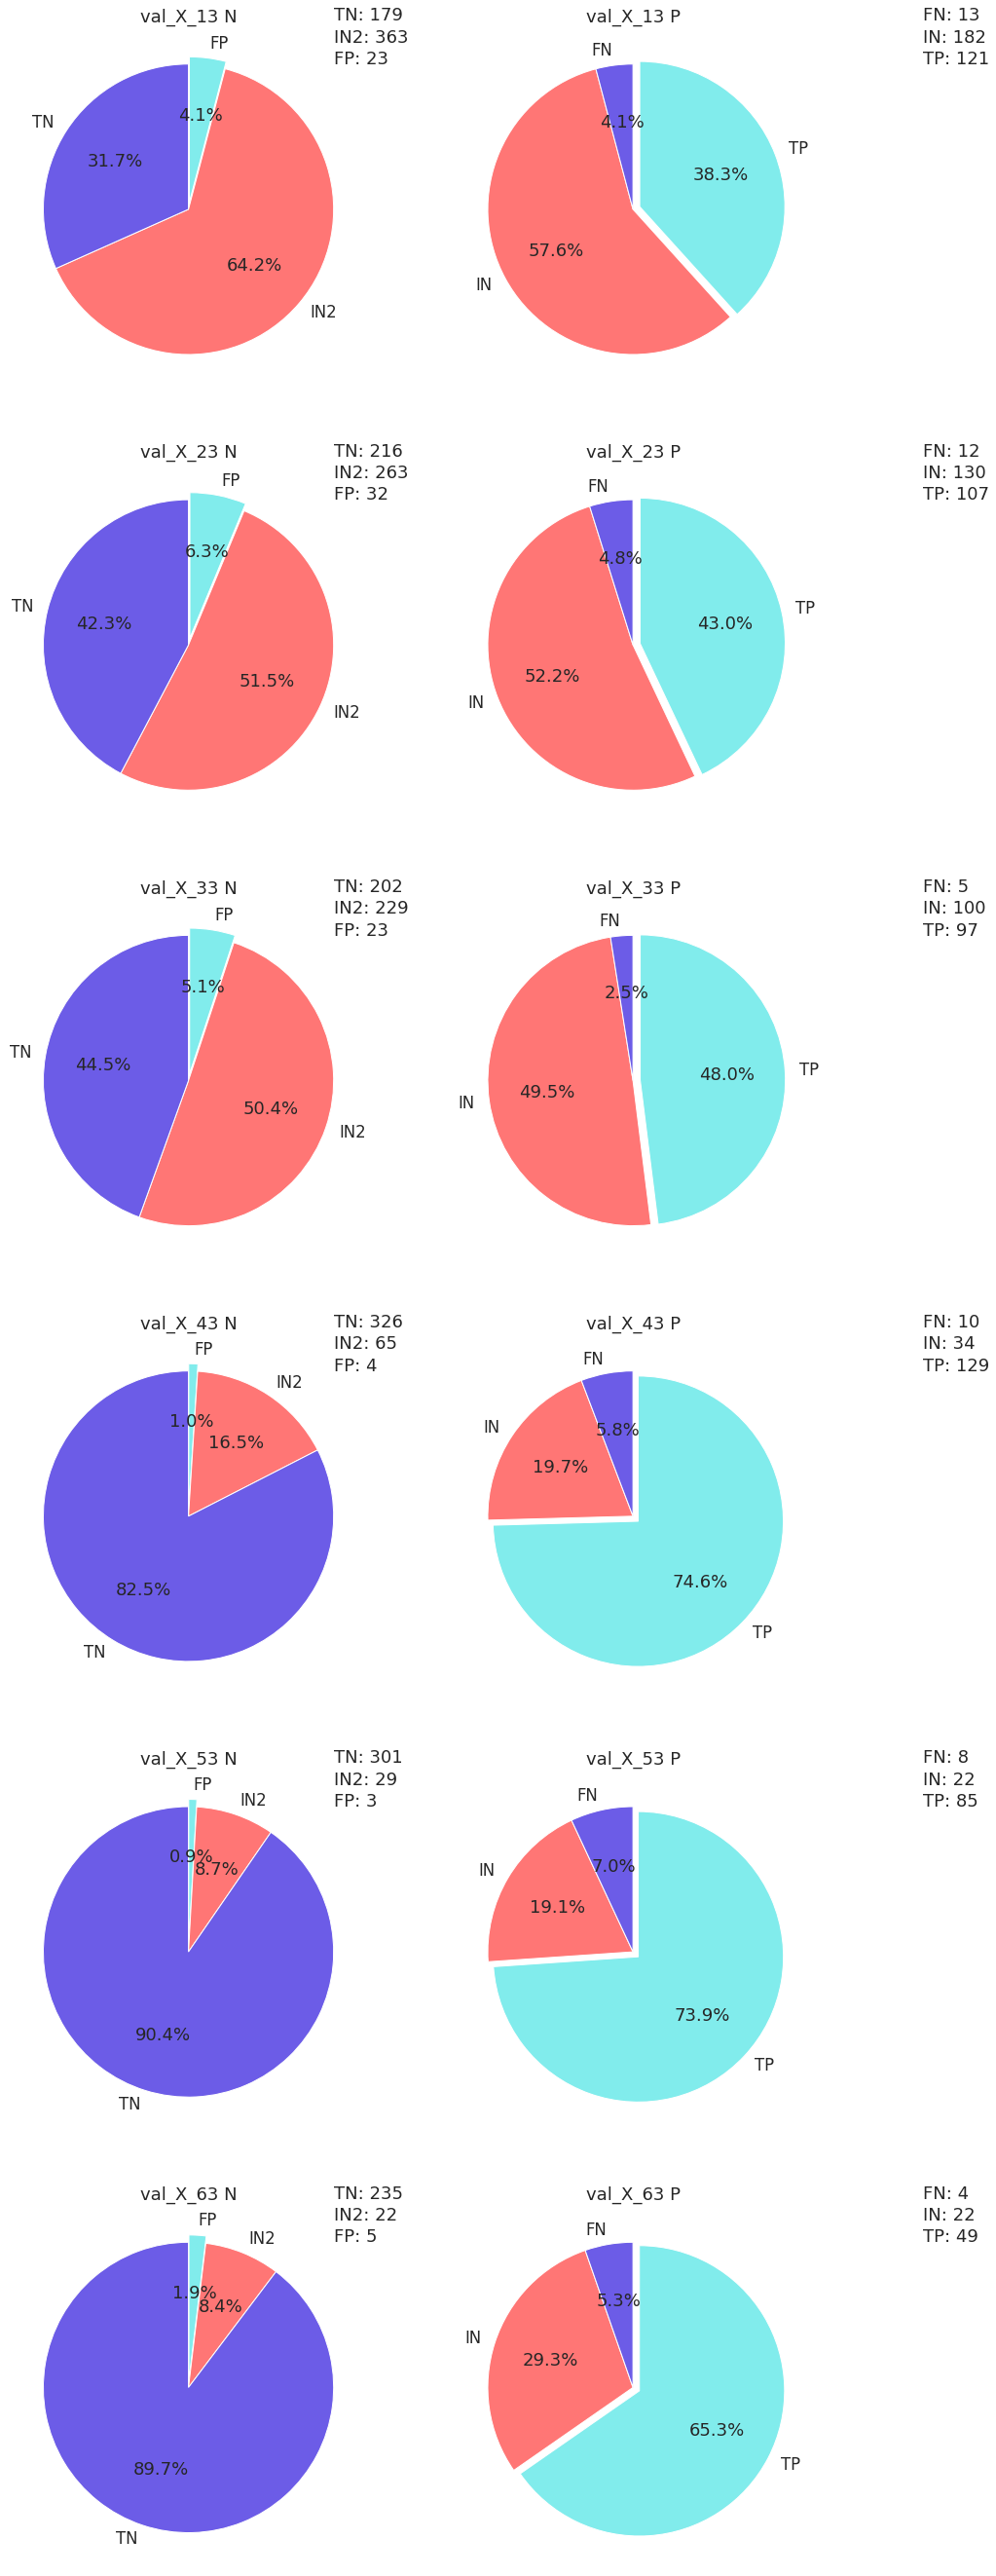

In [37]:
plt.figure(figsize=(15, 8 * 6))
sns.set(font_scale=1.5)
# plt.title('pie')
for i in range(6):
    keys=['FP', 'IN2', 'TN']
    data = plt_data[i]
    start = i * 2
    plt.subplot(6, 2, start+1)
    freq = data['kind'].value_counts()[keys]
    for j,k in enumerate(keys):
        plt.text(1, j*0.15+1, '{}: {}'.format(k, freq[k]))
    plt.title('val_X_{} N'.format(13+i*10))
    plt.pie(freq, labels=freq.index, explode=(0.05, 0, 0), autopct='%.1f%%',
                colors=['#81ecec','#ff7675','#6c5ce7'], startangle=90, counterclock=False)
    keys=['TP', 'IN', 'FN']
    plt.subplot(6, 2, start+2)
    freq = data['kind'].value_counts()[keys]
    for j,k in enumerate(keys):
        plt.text(2, j*0.15+1, '{}: {}'.format(k, freq[k]))
    plt.title('val_X_{} P'.format(13+i*10))
    plt.pie(freq, labels=freq.index, explode=(0.05, 0, 0), autopct='%.1f%%',
                colors=['#81ecec','#ff7675','#6c5ce7'], startangle=90, counterclock=False)
plt.show()

In [14]:
for i in range(6):
    plt_data = plt_data1[i]
    freq1 = plt_data['kind'].value_counts()[keys]
    print(freq1)
    plt_data = plt_data2[i]
    freq2 = plt_data['kind'].value_counts()[keys]
    print(freq2)

FP      23
IN2    363
TN     179
Name: kind, dtype: int64
FP     116
IN2     42
TN     138
Name: kind, dtype: int64
FP      32
IN2    263
TN     216
Name: kind, dtype: int64
FP      84
IN2     49
TN     129
Name: kind, dtype: int64
FP      23
IN2    229
TN     202
Name: kind, dtype: int64
FP      46
IN2     21
TN     111
Name: kind, dtype: int64
FP       4
IN2     65
TN     326
Name: kind, dtype: int64
FP      30
IN2      9
TN     103
Name: kind, dtype: int64
FP       3
IN2     29
TN     301
Name: kind, dtype: int64
FP     22
IN2    10
TN     81
Name: kind, dtype: int64
FP       5
IN2     22
TN     235
Name: kind, dtype: int64
FP     12
IN2     2
TN     36
Name: kind, dtype: int64


In [15]:
win_len, step = 13, 2
X_13 = pd.read_csv('data/train_data/X/X_{}_{}.csv'.format(win_len, step))
y_13 =  pd.read_csv('data/train_data/Y/y_{}_{}.csv'.format(win_len, step))
X_13.shape, y_13.shape

((10340, 19), (10340, 2))

In [16]:
val_data = [[] for i in range(6)]
for i in range(6):
    h1 = 'all_val'
    h2 = 'val_X'
    file = 'data/val_data/{}/{}_{}_{}.csv'
    val_data[i].append(pd.read_csv(file.format(h1, h1, 13+10*i, 2)))
    val_data[i].append(pd.read_csv(file.format(h2, h2, 13+10*i, 2)))

In [17]:
predict = [[] for i in range(6)]
for i in range(0, 6):
    file = 'data/predict/predict_{}_{}.csv'
    predict[i].append(pd.read_csv(file.format(13+10*i, 1)))
    predict[i].append(pd.read_csv(file.format(13+10*i, 2)))

In [18]:
for i in range(6):
    for j in range(2):
        val_data[i][j]['predict'] = predict[i][j]['label']

In [19]:
val_data[0][0].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,no,label,predict
0,0,457.999031,-12337.414445,-10264.228122,-10298.038751,-9875.306665,10350.477491,-6007.867964,6888.262071,22313.563684,-29195.481058,-11101.489512,-140170.833893,8166.656709,4134.930615,16567.605064,1001_35_-1,1,1
1,1,2057.829255,-12736.260654,-9337.677221,-8972.134399,-8774.862430,11193.897533,-6698.547310,5626.004242,20127.617566,-27081.043103,-14585.054685,-140552.060257,6755.868168,4025.423728,16476.497477,1001_35_-1,1,1
2,2,-20282.985806,-14482.895845,-5287.121085,-285.440422,-7279.566559,-4459.954795,4692.037660,7029.673572,16469.090102,-22319.221860,-15603.038207,-106649.038838,-5028.652675,10597.985597,5017.830279,1090_35_-1,1,1
3,3,-16185.737863,-16829.594917,-10249.381805,5785.329832,-7332.098485,-3837.338787,6115.070947,13933.084524,8437.522197,-18348.752993,-9978.213914,-98918.861980,-4330.825465,8558.602992,12530.656531,1090_35_-1,1,1
4,4,115823.407620,270645.234253,188757.336117,110329.576449,16589.464491,-73228.470685,-138621.083457,-11812.845547,-112021.356783,-5415.855408,18771.746483,-6117.263768,-19626.723581,27596.021440,25377.773144,1091_35_-1,1,0


In [20]:
def re_predict(x):
    #     t_label = x['label'].sum()
    p = x['predict'].sum()
    n = x.shape[0] - p
    info = {'no': x.iloc[0]['no'], 'p': p, 'n': n, 'label': x.iloc[0]['label'],
            're_predict': p >= n, 'predict': x.iloc[0]['predict'], 'len': x.shape[0]}
    return pd.DataFrame(info, index=[0])


In [21]:
val_data[0][0].head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,no,label,predict
0,0,457.999031,-12337.414445,-10264.228122,-10298.038751,-9875.306665,10350.477491,-6007.867964,6888.262071,22313.563684,-29195.481058,-11101.489512,-140170.833893,8166.656709,4134.930615,16567.605064,1001_35_-1,1,1
1,1,2057.829255,-12736.260654,-9337.677221,-8972.134399,-8774.862430,11193.897533,-6698.547310,5626.004242,20127.617566,-27081.043103,-14585.054685,-140552.060257,6755.868168,4025.423728,16476.497477,1001_35_-1,1,1
2,2,-20282.985806,-14482.895845,-5287.121085,-285.440422,-7279.566559,-4459.954795,4692.037660,7029.673572,16469.090102,-22319.221860,-15603.038207,-106649.038838,-5028.652675,10597.985597,5017.830279,1090_35_-1,1,1
3,3,-16185.737863,-16829.594917,-10249.381805,5785.329832,-7332.098485,-3837.338787,6115.070947,13933.084524,8437.522197,-18348.752993,-9978.213914,-98918.861980,-4330.825465,8558.602992,12530.656531,1090_35_-1,1,1
4,4,115823.407620,270645.234253,188757.336117,110329.576449,16589.464491,-73228.470685,-138621.083457,-11812.845547,-112021.356783,-5415.855408,18771.746483,-6117.263768,-19626.723581,27596.021440,25377.773144,1091_35_-1,1,0


In [22]:
re_predicts = [[] for i in range(6)]
for i in range(6):
    for j in range(2):
        re_predicts[i].append(val_data[i][j].groupby(['no'], as_index=False).apply(re_predict))

In [23]:
val_data[0][0].shape

(11244, 19)

In [24]:
re_predicts[0][0].head()

,,no,p,n,label,re_predict,predict,len
0,0,1001_08_-1,1,0,1,True,1,1
1,0,1001_35_-1,2,0,1,True,1,2
2,0,1003_31_-1,20,1,1,True,1,21
3,0,1004_31_-1,1,0,1,True,1,1
4,0,1007_30_-1,0,7,0,False,0,7


In [25]:
val_data[0][0]['predict'].sum()

5704

In [26]:
# 第一次预测
x = re_predicts[0][0]
p = x['p'].sum()
tp = x[x['label'] == 1]['p'].sum()
tp, p, tp/p

(4443, 5704, 0.7789270687237027)

In [27]:
# 第二次预测
x = re_predicts[0][0]
p = x[x['re_predict']]['len'].sum()
tp = x[(x['label'] == 1) & (x['re_predict'])]['len'].sum()
tp, p, tp/p

(4958, 5642, 0.8787663948954272)

In [28]:
re_predicts[0][0].head()

,,no,p,n,label,re_predict,predict,len
0,0,1001_08_-1,1,0,1,True,1,1
1,0,1001_35_-1,2,0,1,True,1,2
2,0,1003_31_-1,20,1,1,True,1,21
3,0,1004_31_-1,1,0,1,True,1,1
4,0,1007_30_-1,0,7,0,False,0,7


In [49]:
re_predicts[0][0].shape

(881, 7)

In [29]:
def precision_re(re_predicts):
    print('all_val', 'val_X')
    for i in range(6):
        for j in range(2):
            x = re_predicts[i][j]
            # 未做处理
            print('Befor', end=': ')
            p = x['p'].sum()
            tp = x[x['label'] == 1]['p'].sum()
            print(tp, p, tp/p, end=' | ')
            # 按照p n比例来划分
            print('After', end=': ')
            p = x[x['re_predict']]['len'].sum()
            tp = x[(x['label'] == 1) & (x['re_predict'])]['len'].sum()
            print(tp, p, tp/p, end=' |||| ')
            # 按细胞编号来划分 1
            print('Befor_no', end=': ')
            p = x['predict'].sum()
            tp = x[(x['label'] == 1) & (x['predict'] == 1)].shape[0]
            print(tp, p, tp/p, end=' | ')
            # 按细胞编号来划分 2
            print('After_no', end=': ')
            p = x['re_predict'].sum()
            tp = x[(x['label'] == 1) & (x['re_predict'] == 1)].shape[0]
            print(tp, p, tp/p, end=' | ')
        print()

In [30]:
precision_re(re_predicts)

all_val val_X
Befor: 4443 5704 0.7789270687237027 | After: 4958 5642 0.8787663948954272 |||| Befor_no: 252 386 0.6528497409326425 | After_no: 276 378 0.7301587301587301 | Befor: 210 415 0.5060240963855421 | After: 228 461 0.4945770065075922 |||| Befor_no: 16 158 0.10126582278481013 | After_no: 18 168 0.10714285714285714 | 
Befor: 3343 4186 0.7986144290492116 | After: 3668 4150 0.883855421686747 |||| Befor_no: 204 311 0.6559485530546624 | After_no: 214 307 0.6970684039087948 | Befor: 171 337 0.5074183976261127 | After: 161 358 0.44972067039106145 |||| Befor_no: 13 121 0.10743801652892562 | After_no: 7 129 0.05426356589147287 | 
Befor: 2516 3057 0.8230291135099771 | After: 2769 3046 0.9090610636900853 |||| Befor_no: 159 253 0.6284584980237155 | After_no: 177 244 0.7254098360655737 | Befor: 122 196 0.6224489795918368 | After: 118 196 0.6020408163265306 |||| Befor_no: 11 65 0.16923076923076924 | After_no: 9 67 0.13432835820895522 | 
Befor: 1874 1983 0.9450327786182552 | After: 1896 1954 0.

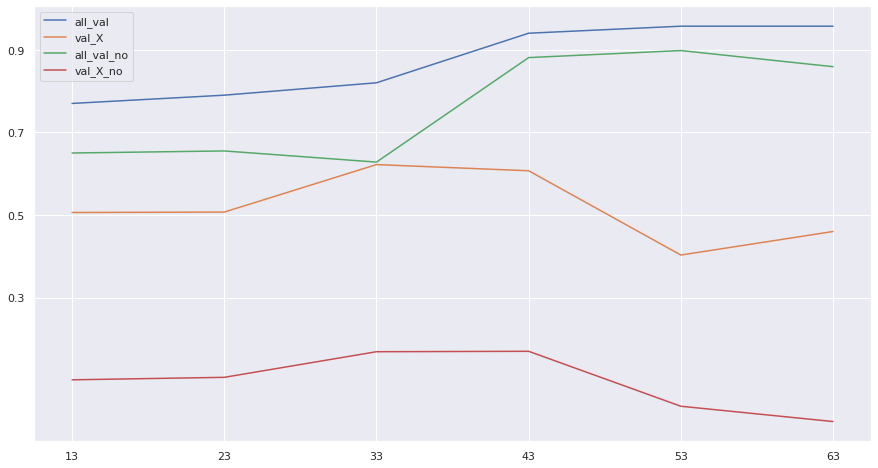

In [31]:
x = list(range(13, 73, 10))
sns.set(font_scale=1)
plt.figure(figsize=(15, 8))
plt.plot(x, [0.77, 0.79, 0.82, 0.94, 0.957, 0.957], '-', label='all_val')
plt.plot(x, [0.506, 0.507, 0.622, 0.607, 0.403, 0.46], '-', label='val_X')
plt.plot(x, [0.65, 0.655, 0.628, 0.881, 0.898, 0.859], '-', label='all_val_no')
plt.plot(x, [0.101, 0.107, 0.169, 0.170, 0.037, 0], '-', label='val_X_no')
plt.xticks(x)
plt.yticks(np.arange(0.3, 1, .2))
plt.legend()
plt.show()

In [32]:
x

[13, 23, 33, 43, 53, 63]

In [33]:
origin_data = pd.read_csv('../res/res.csv')
origin_data = origin_data[origin_data.columns[1:]]
origin_data['len_trace'] = origin_data['end'] - origin_data['start'] + 1

In [34]:
from functools import cmp_to_key


def cmp(a, b):
    a = a.split('_')
    b = b.split('_')
    a1, a2 = int(a[0]), int(a[1])
    b1, b2 = int(b[0]), int(b[1])
    return a1-b1 if a2 == b2 else a2-b2
def get_plt_data(val_indf, tp_ls, fp_ls, tn_ls, fn_ls, tp_fn, fp_tn):
    val_indf_tp = val_indf[(val_indf['no'].isin(tp_ls)) & (~val_indf['no'].isin(tp_fn))]
    val_indf_tp['kind'] = 'TP'
    val_indf_fn = val_indf[(val_indf['no'].isin(fn_ls)) & (~val_indf['no'].isin(tp_fn))]
    val_indf_fn['kind'] = 'FN'
    # tp fn交集
    val_indf_in = val_indf[val_indf['no'].isin(tp_fn)]
    val_indf_in['kind'] = 'IN'

    val_indf_fp = val_indf[(val_indf['no'].isin(fp_ls)) & (~val_indf['no'].isin(fp_tn))]
    val_indf_fp['kind'] = 'FP'
    val_indf_tn = val_indf[(val_indf['no'].isin(tn_ls)) & (~val_indf['no'].isin(fp_tn))]
    val_indf_tn['kind'] = 'TN'
    # fp tn交集
    val_indf_in2 = val_indf[(val_indf['no'].isin(fp_tn))]
    val_indf_in2['kind'] = 'IN2'
    plt_data = pd.concat([val_indf_tp, val_indf_fn, val_indf_in, val_indf_fp, val_indf_tn, val_indf_in2])
    # plt_data = pd.concat([val_indf_fp, val_indf_in2, val_indf_tn])
    return plt_data
def confusion(x, data, feat):
    t = x
    all_val = data
    P = all_val[all_val['label'] == 1]
    TP = all_val[(all_val['label'] == 1) & (all_val['label'] == t)]
    FP = all_val[(all_val['label'] == 0) & (all_val['label'] != t)]
    TP = TP[feat + ['no', 'label']]
    FP = FP[feat + ['no', 'label']]

    N = all_val[all_val['label'] == 0]
    FN = all_val[(all_val['label'] == 1) & (all_val['label'] != t)]
    TN = all_val[(all_val['label'] == 0) & (all_val['label'] == t)]
    TN = TN[feat + ['no', 'label']]
    FN = FN[feat + ['no', 'label']]
    a, b =all_val[all_val['label']==1]['no'].drop_duplicates().shape[0], all_val[all_val['label']==0]['no'].drop_duplicates().shape[0]
    print(all_val.shape)
    print(TP.shape[0], FP.shape[0], TN.shape[0], FN.shape[0], a, b)
    return TP, FP, TN, FN
def get_no_ls(x, val_data, all_real_no, val_no, feat):
    TP, FP, TN, FN = confusion(x, val_data, feat)
    tp_no, fp_no = TP['no'].drop_duplicates(), FP['no'].drop_duplicates()
    tn_no, fn_no = TN['no'].drop_duplicates(), FN['no'].drop_duplicates()
    tp_ls = []
    for i in tp_no.index:
        tp_ls.append(tp_no[i])
    fp_ls = []
    for i in fp_no.index:
        fp_ls.append(fp_no[i])
    tn_ls = []
    for i in tn_no.index:
        tn_ls.append(tn_no[i])
    fn_ls = []
    for i in fn_no.index:
        fn_ls.append(fn_no[i])
    all_real_ls = []
    for i in all_real_no.index:
        all_real_ls.append(all_real_no[i])
    val_ls = []
    for i in val_no.index:
        val_ls.append(val_no[i])
    print(tp_no.shape[0], fp_no.shape[0], tn_no.shape[0], fn_no.shape[0])
    return tp_ls, fp_ls, tn_ls, fn_ls, all_real_ls, val_ls
def analysis_confusion_matrix(x, all_val, val_X, val_data, feat):
    # 验证混淆矩阵
    val_no = val_X[val_X['label'] == 1]['no'].drop_duplicates()
    all_real_no = all_val['no'].drop_duplicates()
    tp_ls, fp_ls, tn_ls, fn_ls, all_real_ls, val_ls = get_no_ls(
        x, val_data, all_real_no, val_no, feat)
    # 即被分为fp也被分为tn
    fp_tn = [i for i in fp_ls if i in tn_ls]
    print('len -> fp_tn: {}, fp_ls: {}, tn_ls: {}'.format(len(fp_tn),
          len(fp_ls), len(tn_ls)))
    # 既被分为p也被分为n
    tp_fn = [i for i in tp_ls if i in fn_ls]
    print('len -> tp_fn: {}, tp_ls: {}, fn_ls: {}'.format(len(tp_fn),
          len(tp_ls), len(fn_ls)))
    val_indf = origin_data[origin_data['no'].isin(val_data['no'].drop_duplicates())][[
        'no', 'len_trace']].drop_duplicates()
    plt_data = get_plt_data(val_indf, tp_ls, fp_ls,
                            tn_ls, fn_ls, tp_fn, fp_tn)
    all_real_no = sorted(all_real_no, key=cmp_to_key(cmp))
    plt_data['a1'] = plt_data['no'].apply(lambda x: int(x.split('_')[0]))
    plt_data['a2'] = plt_data['no'].apply(lambda x: int(x.split('_')[1]))
    plt_data = plt_data.sort_values(by=['a2', 'a1'], ascending=[True, True])
    return plt_data

In [35]:
plt_data = []
for i in range(6):
    x = val_data[i][0]
    plt_data.append(analysis_confusion_matrix(x['predict'], val_data[i][1], x, x, list(x.columns[1:-3])))

(11244, 19)
4443 1261 4361 1179 316 565
303 386 542 195
len -> fp_tn: 363, fp_ls: 386, tn_ls: 542
len -> tp_fn: 182, tp_ls: 303, fn_ls: 195


/tmp/ipykernel_173759/1358592423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_indf_tp['kind'] = 'TP'
/tmp/ipykernel_173759/1358592423.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_indf_fn['kind'] = 'FN'
/tmp/ipykernel_173759/1358592423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

(8404, 27)
3343 843 3359 859 249 511
237 295 479 142
len -> fp_tn: 263, fp_ls: 295, tn_ls: 479
len -> tp_fn: 130, tp_ls: 237, fn_ls: 142
(6128, 37)
2516 541 2523 548 202 454
197 252 431 105
len -> fp_tn: 229, fp_ls: 252, tn_ls: 431
len -> tp_fn: 100, tp_ls: 197, fn_ls: 105
(4224, 44)
1874 109 2003 238 173 395
163 69 391 44
len -> fp_tn: 65, fp_ls: 69, tn_ls: 391
len -> tp_fn: 34, tp_ls: 163, fn_ls: 44
(2762, 49)
1097 49 1332 284 115 333
107 32 330 30
len -> fp_tn: 29, fp_ls: 32, tn_ls: 330
len -> tp_fn: 22, tp_ls: 107, fn_ls: 30
(1782, 53)
766 34 857 125 75 262
71 27 257 26
len -> fp_tn: 22, fp_ls: 27, tn_ls: 257
len -> tp_fn: 22, tp_ls: 71, fn_ls: 26


In [39]:
plt_data[0].head()

,no,len_trace,kind,a1,a2
1663,35_02_-1,77,IN2,35,2
3054,55_02_-1,31,TP,55,2
4791,115_02_-1,138,IN2,115,2
5715,156_02_-1,130,IN2,156,2
5872,159_02_-1,29,TN,159,2


In [48]:
keys = ['TP', 'FN', 'IN', 'FP', 'TN', 'IN2']
a = [0] * 6
for j, i in enumerate(keys):
    x = plt_data[0]
    x = x[x['kind'] == i]
    a[j] = x['len_trace'].sum()
    print(i, x.shape[0], a[j], a[j]//x.shape[0])


TP 121 3892 32
FN 13 232 17
IN 182 10744 59
FP 23 877 38
TN 179 10995 61
IN2 363 35779 98


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]